# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1790]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Overview

In [1791]:
# load data
data= pd.read_csv('used_device_data.csv')

In [1792]:
# check the shape of the data
data.shape

(3454, 15)

In [1793]:
# view a sample of the data
data.sample(n=5, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415


In [1794]:
# create a copy of the data to avoid any changes to original data
df= data.copy()

In [1795]:
# check the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [1796]:
# check for duplicate values
df.duplicated().sum() 

0

In [1797]:
# check for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [1885]:
# check statistical summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


#### Observations:
* The dataset has 3454 rows and 15 columns.
* There are 4 categorical variables and 11 numerical variables.
* There are missing values in six variables- main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight.
* Most of the data in "ram" is 4 GB.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [1799]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="-"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="blue", linestyle="--"
    )  # Add median to the histogram
    ax_hist2.axvline(data[feature].mode()[0], color="green", linestyle="--", linewidth=1
    ) # Add mode to the histogram

In [1800]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`screen_size`**

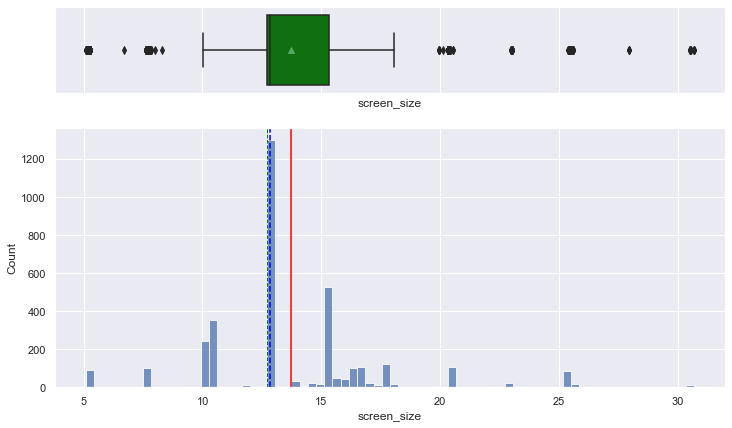

In [1801]:
# create histogram_boxplot for 'screen_size'
histogram_boxplot(df, 'screen_size')

#### Observations:
* The majority of the screen size in the dataset is around 13 cm.
* The range of screen size range is from 5 cm to 30 cm. The dataset, including phones and tablets, causes a wide range of many attributes
* There are outliers.

**`main_camera_mp`**

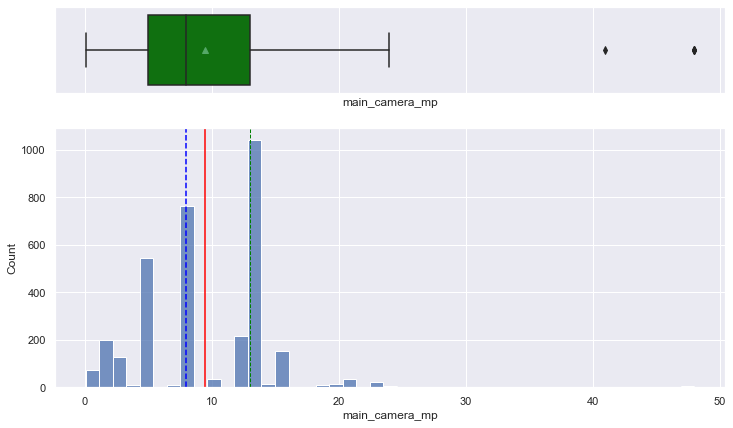

In [1802]:
# create histogram_boxplot for 'main_camera_mp'
histogram_boxplot(df, 'main_camera_mp')

#### Observations:
* The main camera mp ranges from 0.08 to 48 mp, also caused by the dataset having phones and tablets included.
* The majority of the main camera is 13 mp.
* There are outliers.

**`selfie_camera_mp`**

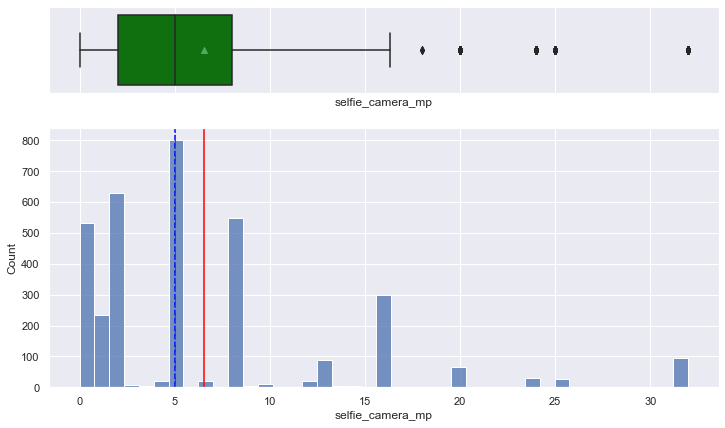

In [1803]:
# create histogram_boxplot for 'selfie_camera_mp'
histogram_boxplot(df, 'selfie_camera_mp')  

#### Observations:
* The selfie camera mp ranges from 0 to 32 mp, also caused by the dataset having phones and tablets included.
* The majority of the selfie camera is 5 mp which is lower than the main camera.
* There are outliers.

**`int_memory`**

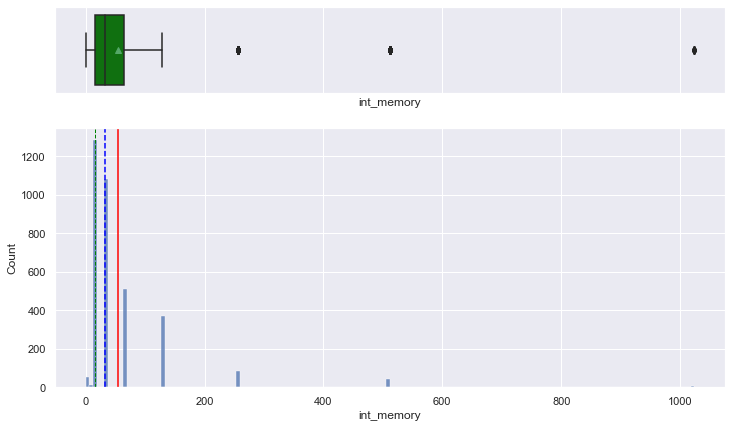

In [1804]:
# create histogram_boxplot for 'int_memory'
histogram_boxplot(df, 'int_memory')  

#### Observations:
* The amount of internal memory ranges from 0.01 to 1024 GB. 
* The majority of the internal memory is 16 GB.
* There are outliers.

**`ram`**

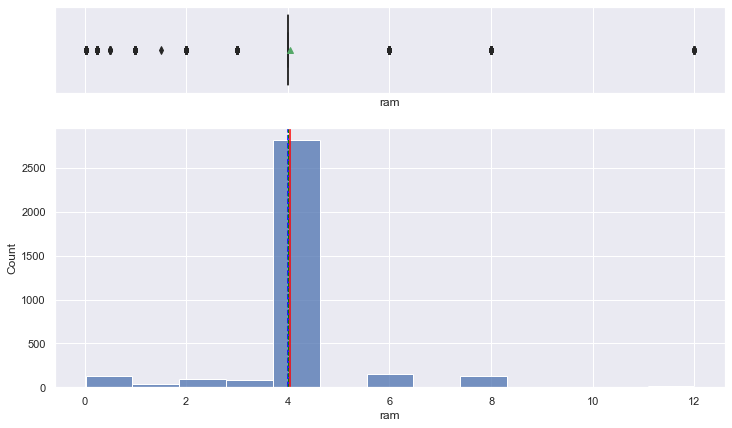

In [1805]:
# create histogram_boxplot for 'ram'
histogram_boxplot(df, 'ram')  

In [1806]:
# check the percentage of each ram in the dataset
df.ram.value_counts()/df.ram.shape[0]

4.00     0.814997
6.00     0.044586
8.00     0.037638
2.00     0.026057
0.25     0.024030
3.00     0.023451
1.00     0.009844
12.00    0.005211
0.02     0.005211
0.03     0.004922
0.50     0.002606
1.50     0.000290
Name: ram, dtype: float64

#### Observations:
* The 25, 50, and 75 percentile of the ram are 4 GB. 
* The ram ranges from 0.02 GB to 12 GB. 
* 81% of the data has ram with 4 GB.
* There are outliers.

**`weight`**

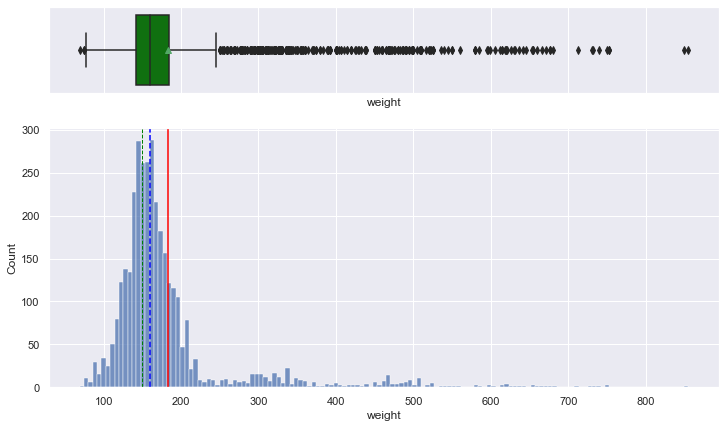

In [1807]:
# create histogram_boxplot for 'weight'
histogram_boxplot(df, 'weight')  

#### Observations:
* The weight ranges from 69g to 855g in the dataset.
* The majority of weight is 150g. 
* It looks like right-skewed normal distribution.
* There are outliers.

In [1808]:
# apply the log transform to see if we can make the distribution of weight closer to normal
df['weight_log'] = np.log(df['weight'])

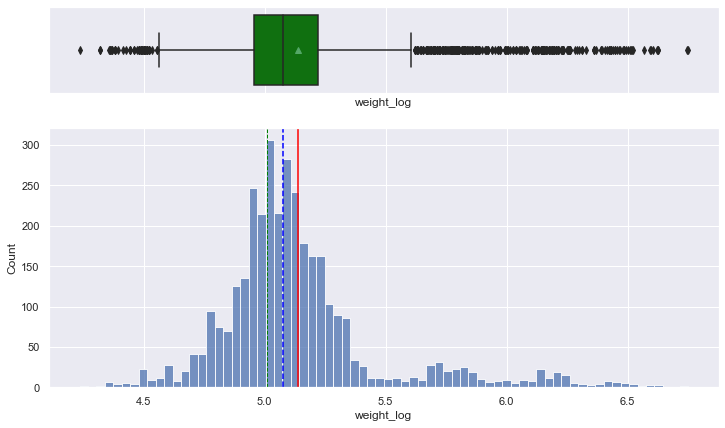

In [1809]:
# create histogram_boxplot for 'weight_log'
histogram_boxplot(df, 'weight_log')  

In [1810]:
# check the statistical summary in weight and weight_log
df_weight= df[['weight','weight_log']]
df_weight.describe()

,weight,weight_log
count,3447.000000,3447.000000
mean,182.751871,5.136474
std,88.413228,0.342309
min,69.000000,4.234107
25%,142.000000,4.955827
50%,160.000000,5.075174
75%,185.000000,5.220356
max,855.000000,6.751101


**`battery`**

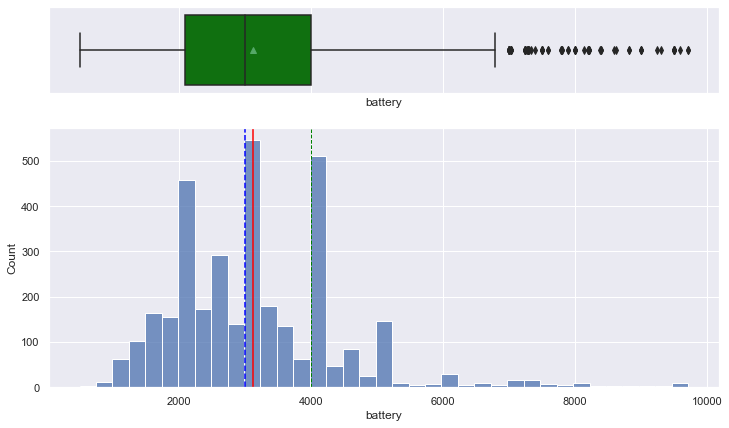

In [1811]:
# create histogram_boxplot for 'battery'
histogram_boxplot(df, 'battery')  

#### Observations:
* The battery ranges from 500mAh to 9720mAh. The majority of the dataset is 4000mAh. 
* The average of battery is around 3100mAh.
* There are outliers.

**`days_used`**

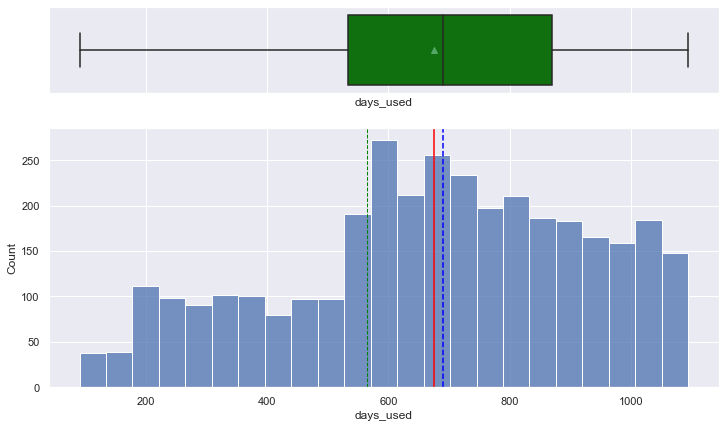

In [1812]:
# create histogram_boxplot for 'days_used'
histogram_boxplot(df, 'days_used')  

In [1813]:
# check how many years used in majority of the dataset
df.days_used.mode().mean()/365

1.5917808219178082

#### Observations:
* The days used range from 91 to 1094 days(3 months to 3 years). 
* Most of the days used are around 1.6 years before selling.
* The average used days is about 675 days, less than 2 years.
* There are no outliers.

**`normalized_used_price`**

**(Q1) What does the distribution of normalized used device prices look like?**

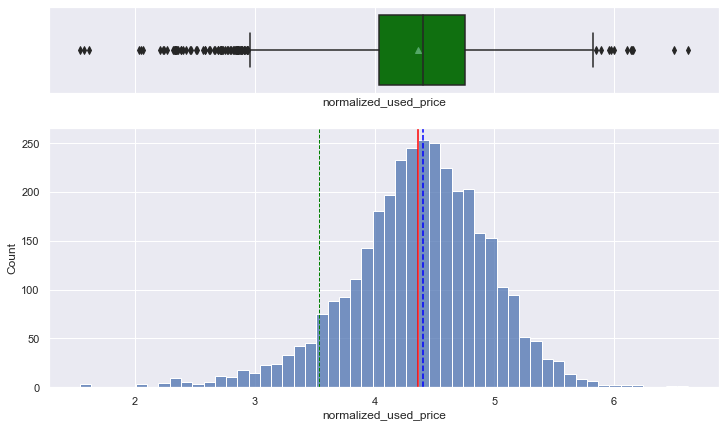

In [1814]:
# create histogram_boxplot for 'normalized_used_price'
histogram_boxplot(df, "normalized_used_price") 

#### Obervations:
* The distribution of normalized used device prices looks like slightly left skewed normal distribution.
* The normalized used price ranges from 1.5 to 6.6 euros. 
* There are outliers.

**`normalized_new_price`**

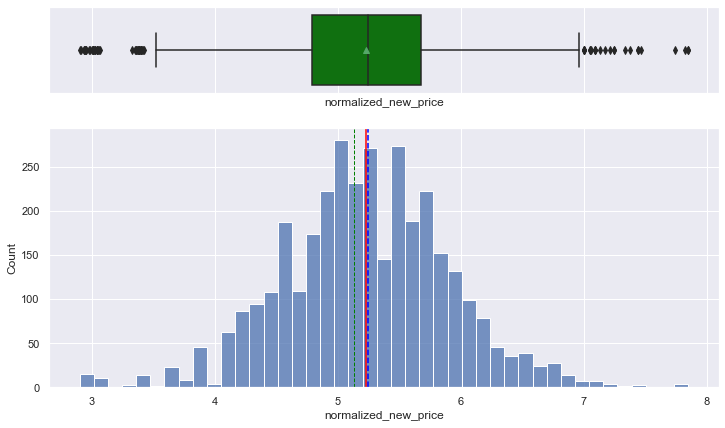

In [1815]:
# create histogram_boxplot for 'normalized_new_price'
histogram_boxplot(df, 'normalized_new_price') 

#### Obervations:
* The normalized new price ranges from 2.9 to 7.8 euros. 
* The average new price is around 5.2 euros,  around 1 euro larger than 4.4 euros of the used price.
* There are outliers.

**`release_year`**

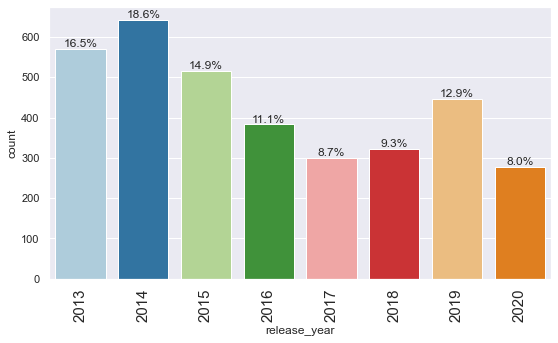

In [1816]:
# create labeled_barplot for 'release_year'
labeled_barplot(df, 'release_year', perc=True) 

#### Obervations:
* The release years are between 2013 and 2020. 
* The first three years of the dataset account for 50% of all data.

**`brand_name`**

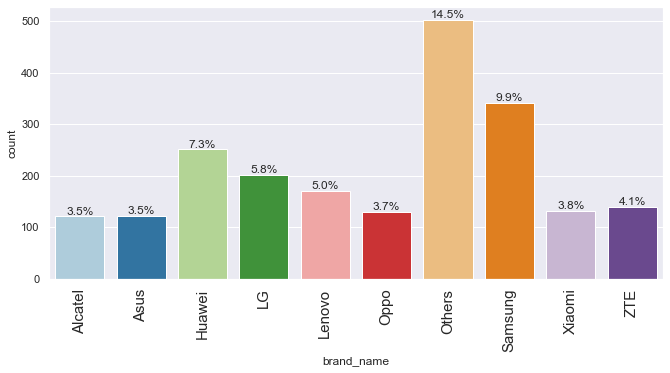

In [1817]:
# create labeled_barplot for 'brand_name'
labeled_barplot(df, "brand_name", perc=True, n=10)

#### Obervations:
* Most counts of brand name in the dataset is "Others." It would be better to know what it includes.
* Samsung, Huawei, and LG are the top 3 brand names in the dataset except for Others.

**`os`**

**(Q2) What percentage of the used device market is dominated by Android devices?**

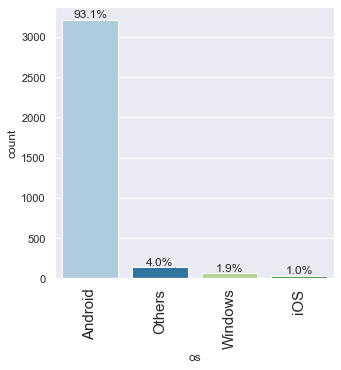

In [1818]:
# create labeled_barplot for 'os'
labeled_barplot(df, 'os', perc=True) 

#### Observations:
* A 93.1% of the used device market is dominated by Android devices.

**`4g`**

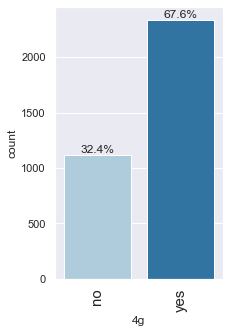

In [1819]:
# create labeled_barplot for '4g'
labeled_barplot(df, '4g', perc=True) 

#### Observations:
* In the dataset, around 68% of the devices are available for 4G.

**`5g`**

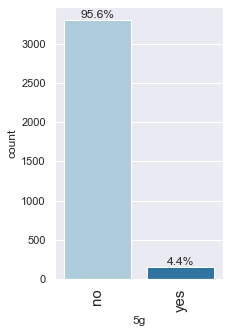

In [1820]:
# create labeled_barplot for '5g'
labeled_barplot(df, '5g', perc=True) 

#### Observations:
* In the dataset, only 4.4% of the devices are available for 5G.

### Bivariate Analysis

**(Q7) Which attributes are highly correlated with the normalized price of a used device?**

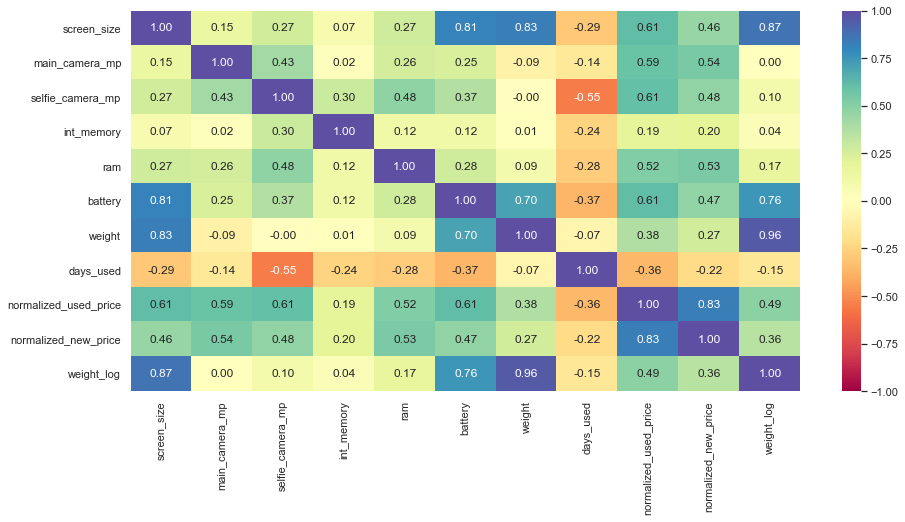

In [1821]:
cols_list= df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('release_year')

# plot corrlations between variables
plt.figure(figsize=(15,7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations: 
* Normalized new price is the most highly correlated with the normalized price of a used device. Screen size, selfie camera, battery, and main camera are also nicely related to the used normalized price.

**`RAM vs. brand_name`**

**(Q3) The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand? Let's see how the amount of RAM varies across brands.**

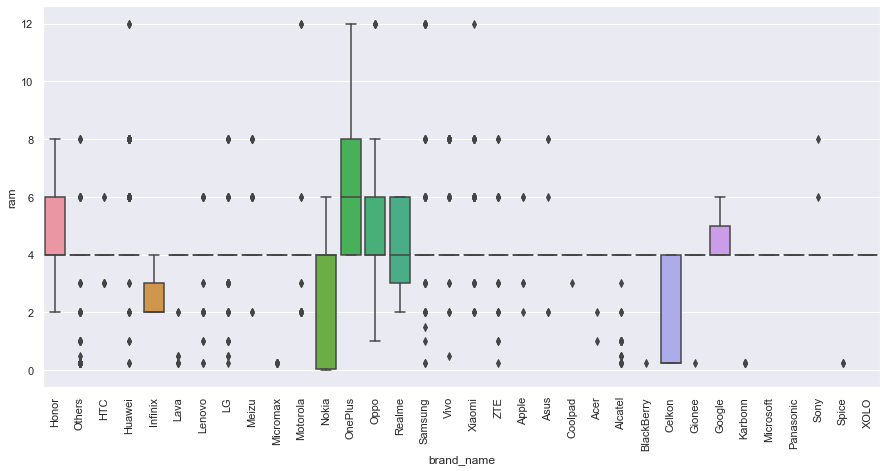

In [1822]:
# create a boxplot for 'brand_name' and 'ram'
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

#### Observations
* There are 34 brand names in the dataset. 
* In the dataset, about 81% of the ram is 4 GB across 34 brands.
* About 8.7% is higher than 4 GB and about 9.7% is lower than 4 GB across 31 brands.
* There are 8 brands with no outliers.
* Celkon, Nokia, and Infinix have the lower average ram.
* OnePlus has the highest average ram in the dataset.

In [1823]:
# check the amount of ram varies across brands
print('The ram is higher than 4 GB.')
print(df[df['ram']>4].groupby(by='ram')['brand_name'].value_counts())
print(' ')
print('The ram is lower than 4 GB.')
print(df[df['ram']<4].groupby(by='ram')['brand_name'].value_counts())
print(' ')
print('The ram is equal to 4 GB.')
print(df[df['ram']==4].groupby(by='ram')['brand_name'].value_counts())

# Brand names with above 4 GB ram
dfram_high= df[df['ram']>4]['brand_name'].nunique()
print(dfram_high)

# Brand names with below 4 GB ram
dfram_low= df[df['ram']<4]['brand_name'].nunique()
print(dfram_low)

# Brand names with equal 4 GB ram
dfram_equal= df[df['ram']==4]['brand_name'].nunique()
print(dfram_equal)

# Brand names with not equal 4 GB ram
dfram_notequal= df[df['ram']!=4]['brand_name'].nunique()
print(dfram_notequal)

The ram is higher than 4 GB.
ram   brand_name
6.0   Huawei        34
      Xiaomi        20
      Honor         14
      Realme        12
      Samsung       10
      Vivo           9
      Meizu          8
      Others         8
      LG             6
      Lenovo         6
      Oppo           6
      ZTE            5
      Google         4
      Apple          2
      HTC            2
      Motorola       2
      Nokia          2
      OnePlus        2
      Asus           1
      Sony           1
8.0   Huawei        26
      Oppo          24
      Vivo          20
      Honor         16
      Xiaomi        11
      OnePlus        8
      LG             6
      Samsung        6
      Meizu          4
      Others         3
      ZTE            3
      Asus           2
      Sony           1
12.0  Samsung        7
      Oppo           4
      Huawei         2
      Motorola       2
      OnePlus        2
      Xiaomi         1
Name: brand_name, dtype: int64
 
The ram is lower than 4 

In [1824]:
# check the percentage for each amount of ram
df.ram.value_counts()/df.shape[0]

4.00     0.814997
6.00     0.044586
8.00     0.037638
2.00     0.026057
0.25     0.024030
3.00     0.023451
1.00     0.009844
12.00    0.005211
0.02     0.005211
0.03     0.004922
0.50     0.002606
1.50     0.000290
Name: ram, dtype: float64

**`weight vs. brand_name`**

**(Q4) A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)? Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [1825]:
# create a dataframe with battery larger than 4500
large_battery= df[df.battery> 4500]
large_battery.shape

(341, 16)

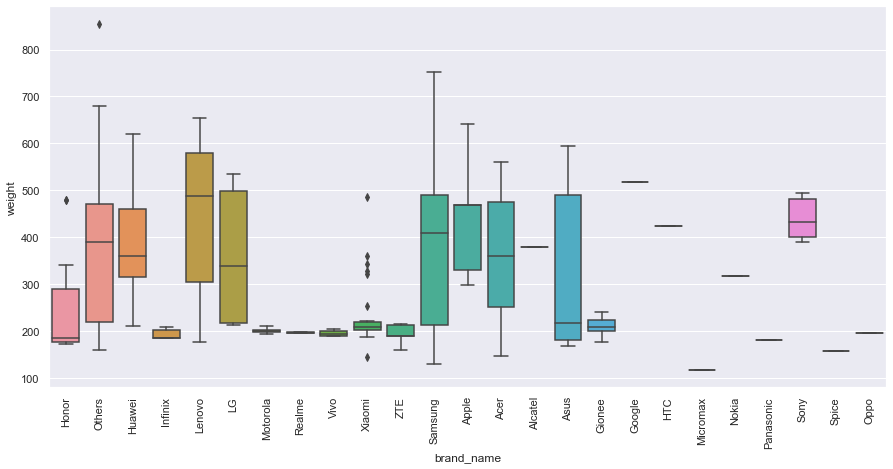

In [1826]:
# create a boxplot for 'brand_name' and 'weight'
plt.figure(figsize=(15,7))
sns.boxplot(data=large_battery, x='brand_name', y='weight')
plt.xticks(rotation=90)
plt.show()

In [1827]:
# ckech the average weight for each battery mAh
large_battery.groupby(by='battery')['weight'].mean()

battery
4520.0    206.500000
4550.0    290.500000
4600.0    348.987500
4680.0    244.000000
4700.0    310.200000
             ...    
9240.0    517.000000
9300.0    637.000000
9500.0    743.033333
9600.0    619.000000
9720.0    636.000000
Name: weight, Length: 72, dtype: float64

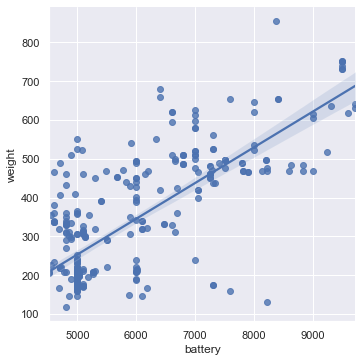

In [1828]:
# create a lmplot for 'battery' and 'weight'
sns.lmplot(y="weight", x="battery", data=large_battery);

#### Obervations:
* Honor, Xiaomi, and Others have outliers.
* The weight and battery have a positive relationship based on the lmplot.
* The phones and tablets' weights will increase when offering larger batteries.

**`screen_size vs. brand_name`**

**(Q5) Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [1829]:
# create a dataframe with screen size larger than 6 inches
large_screen= df[df.screen_size> 6*2.54]
large_screen.shape

(1099, 16)

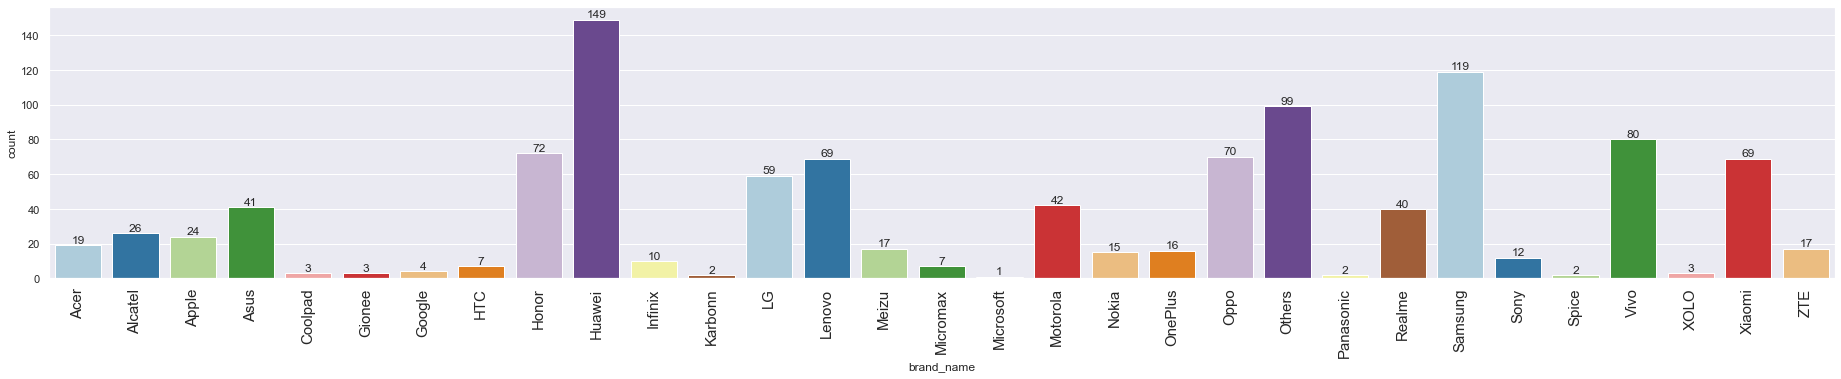

In [1830]:
# create labeled_barplot for 'brand_name' in large screen dataframe
labeled_barplot(large_screen, 'brand_name')

#### Observations:
* There are 1099 phones and tablets with screen sizes larger than 6 inches in the dataset.
* There are 31 different brands with a screen size larger than 6 inches. Huawei, Samsung, Vivo, Honor, and Oppo are the top 5 brands. 
* There is "Others" in the dataset. It will be better to know what is included.

**`selfie_camera_mp vs. brand_name`**

**(Q6) A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [1831]:
# create a dataframe with selfie camera greater than 8MP
selfie_camera= df[df.selfie_camera_mp> 8]
selfie_camera.shape

(655, 16)

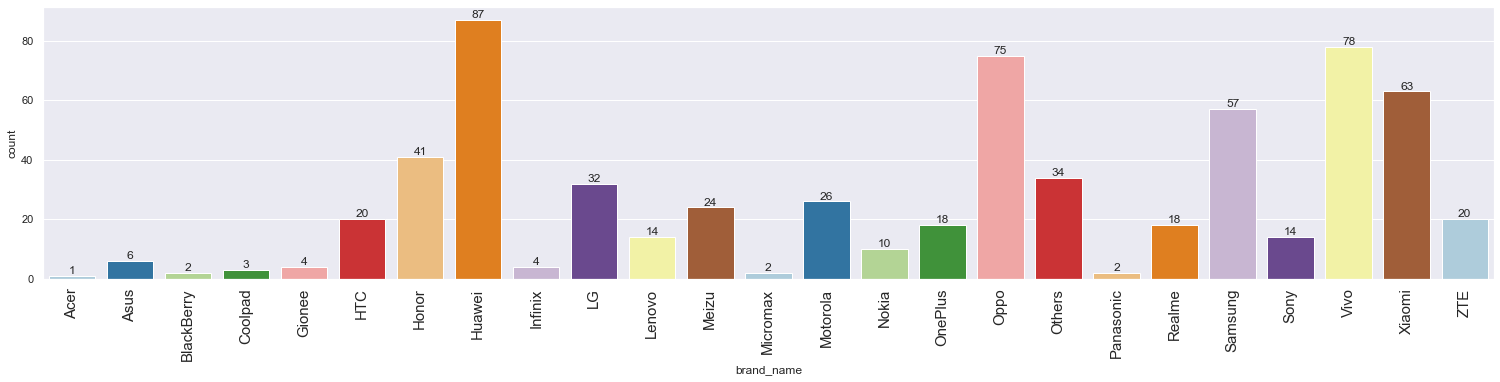

In [1832]:
# create labeled_barplot for 'brand_name' in high selfie camera dataframe
labeled_barplot(selfie_camera, 'brand_name')

#### Observations:
* Huawei, Vivo, Oppo, Xiaomi and Samsung are the top 5 brands with selfie camera greater than 8MP.

**`main_camera_mp vs. brand_name`**

In [1833]:
# Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.
# create a dataframe with rear cameras with higher than 16MP
main_camera= df[df.main_camera_mp> 16]
main_camera.shape

(94, 16)

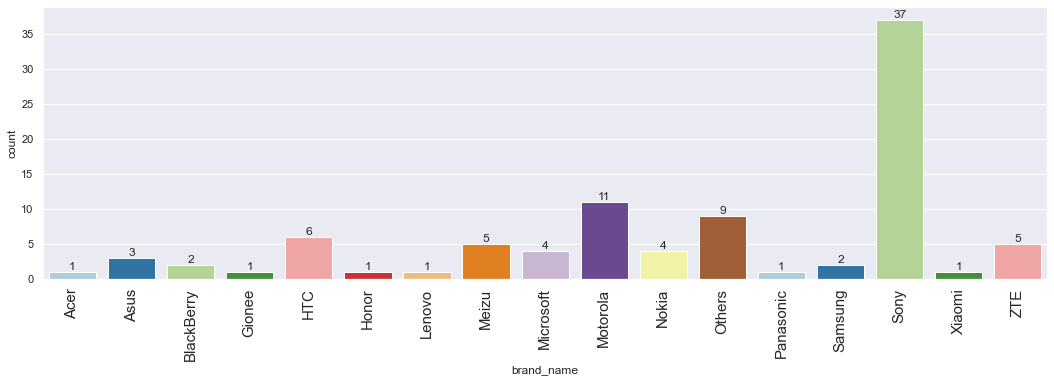

In [1834]:
# create labeled_barplot for 'brand_name' in high main camera dataframe
labeled_barplot(main_camera, 'brand_name')

#### Observations:
* Sony is the top 1 brand with main camera greater than 16MP.

**`normalized_used_price vs. release_year`**

**Let's see how the price of used devices varies across the years.**

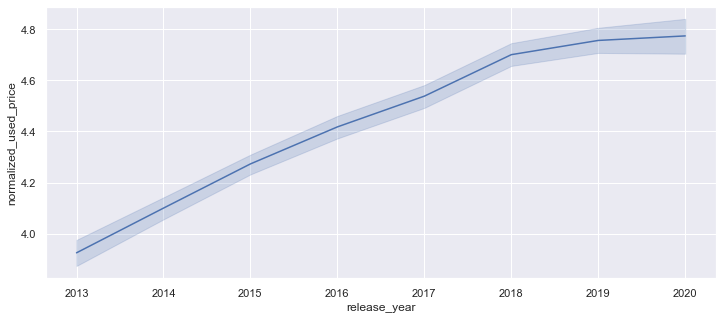

In [1835]:
# create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(data= df, x='release_year',y='normalized_used_price') 
plt.show()

#### Observations:
* The price of used devices increased across the years.

**`4g & 5g vs. normalized_used_price`**

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

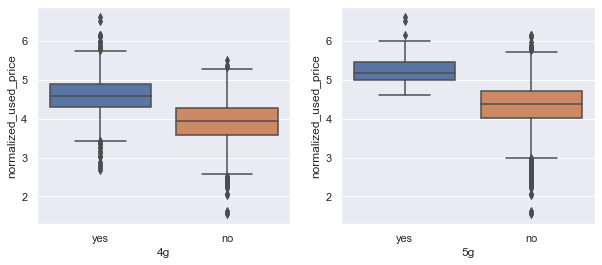

In [1836]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price", order=['yes','no'])

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price", order=['yes','no'])

plt.show()

#### Observations:
* The average price of used devices with 5G is higher than those with 4G.
* The average prices of used devices with 4G or 5G networks are higher than without them.

NameError: name 'outlier_check' is not defined

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [1837]:
# create a copy of the data
df1= df.copy()

# check the first 5 rows of the data
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


In [1838]:
# check for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

In [1839]:
# count the number of missing value per row
num_missing= df1.isnull().sum(axis=1)
num_missing.value_counts()

0    3253
1     193
2       8
dtype: int64

**Check the rows that have exactly 1 and 2 missing values**

In [1840]:
df1[num_missing == 1].sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
327,Motorola,Android,15.37,yes,no,NaN,16.0,128.0,6.0,5000.0,210.0,2020,92,5.034156,5.697295,5.347108
3260,Realme,Android,16.36,yes,yes,NaN,8.0,128.0,6.0,4200.0,209.0,2020,148,4.755313,5.979493,5.342334
3306,Xiaomi,Android,16.94,yes,yes,NaN,20.0,256.0,8.0,4500.0,208.0,2020,112,5.341329,6.570869,5.337538
197,Xiaomi,Android,16.94,yes,no,NaN,16.0,64.0,6.0,4500.0,208.0,2020,169,4.967310,5.295513,5.337538
3409,Realme,Android,15.37,yes,no,NaN,13.0,64.0,4.0,5000.0,198.0,2019,293,4.487737,4.967380,5.288267


In [1841]:
df1[num_missing == 2].sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.00,4.0,2100.0,NaN,2015,878,3.879706,4.081090,NaN
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.00,4.0,2500.0,NaN,2015,679,3.837084,4.347176,NaN
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905,4.41401
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.00,4.0,3200.0,NaN,2015,800,4.282068,5.189228,NaN
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.00,4.0,2200.0,NaN,2015,838,3.707210,4.791733,NaN


In [1842]:
# check where the missing value come from
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        missing_per_col= df[num_missing == n].isnull().sum()
        print(missing_per_col[missing_per_col> 0])
        print('\n')

For the rows with exactly 1 missing values, NAs are found in:
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   3
battery               5
dtype: int64


For the rows with exactly 2 missing values, NAs are found in:
ram           1
battery       1
weight        7
weight_log    7
dtype: int64




* Most of 1 missing value is coming from the column "main_camera_mp". 
* For the rows with exactly 2 missing values, weight_log missing is coming from weight column missing. In addition, the ram and battery missing are in the same row.

**Filling in with a median value**

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [1843]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
# impute missing values in cols_impute with median by grouping the data on release year and brand name 
for col in cols_impute:
    df1[col] = df1.groupby(['brand_name','release_year'])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [1844]:
# check for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
weight_log                 7
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [1845]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
# impute the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df1[col] = df1.groupby('brand_name')[col].transform(
        lambda x: x.fillna(x.median()) 
    )

In [1846]:
# check for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
weight_log                7
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.
- We will re-apply the log-transform to the `weight` column.

In [1847]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) # impute the data with median

# re-applying the log-transform to the weight column
df1["weight_log"] = np.log(df1["weight"])

# check for missing values
df1.isnull().sum() # check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

### Feature engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [1848]:
# create a new column years_since_release
df1['years_since_release']= 2021- df1['release_year']
df1.drop('release_year', axis=1, inplace=True)
df1['years_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier detection and treatment

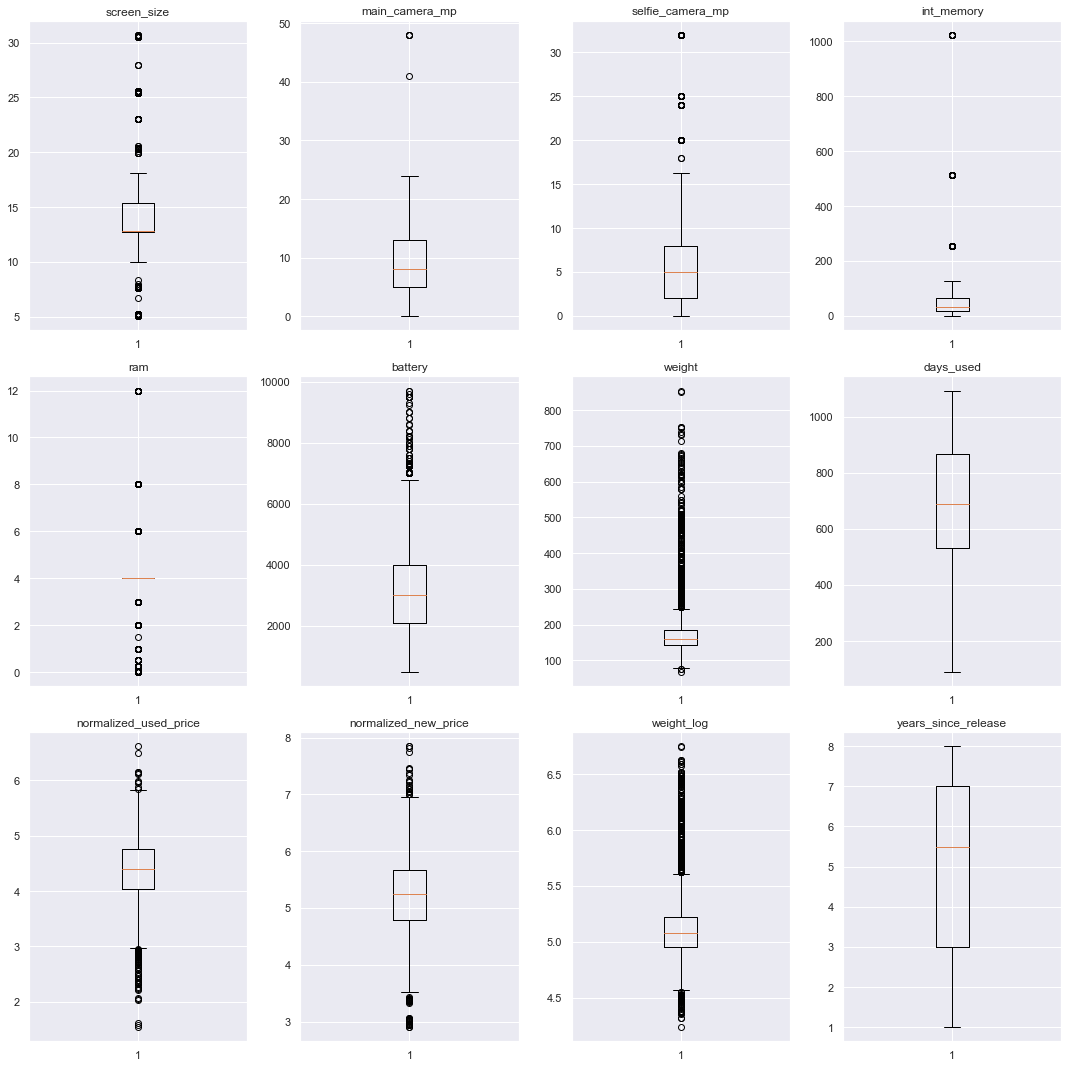

In [1849]:
# outlier detection
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

# tolist() converts the Series of the pandas data frame to a list. Thus all object and category type of all columns gets converted into the list.
# plot boxplot for all numeric columns
plt.figure(figsize=(15,15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [1850]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [1851]:
treat_out_cols = [] # the columns for which outliers have to be treated 

df2 = treat_outliers_all(df1, treat_out_cols)

**After testing out outlier treatments one by one, we decided not to make any treatments for any variables since it has better results this way. Additionally, the dataset contains the attributes of both phones and tablets, and we don't know the percentage of them, so outlier treatments could distort the data.**

(We will skip the following code.)

In [1852]:
# plot boxplot for all numeric columns after outlier treatments
# plt.figure(figsize=(15, 15))

# for i, variable in enumerate(numeric_columns):
#     plt.subplot(3, 4, i + 1)
#     plt.boxplot(df2[variable], whis=1.5)
#     plt.tight_layout()
#     plt.title(variable)

# plt.show()

In [1853]:
# check the statistical summary of the data once
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


### Preparing data for modeling

- We want to predict the normalized price of used devices.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [1854]:
# independent variables
x = df2.drop(['normalized_used_price'], axis=1)
# dependent variable
y = df2['normalized_used_price']

print(x.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  weight_log  years_since_release  
0              4.715100    4.983607                    1  
1              5.519018    5.361292                    1  
2              5.884631    5.

In [1855]:
# creating dummy variables
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  # create dummies for independent features

x.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,weight_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,4.983607,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,5.361292,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,5.361292,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,6.173786,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,5.220356,...,0,0,0,0,0,0,0,0,1,0


In [1856]:
# split the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
) # split the data into train and test in specified ratio

In [1857]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA After Data Preprocessing

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

**`main_camera_mp`**

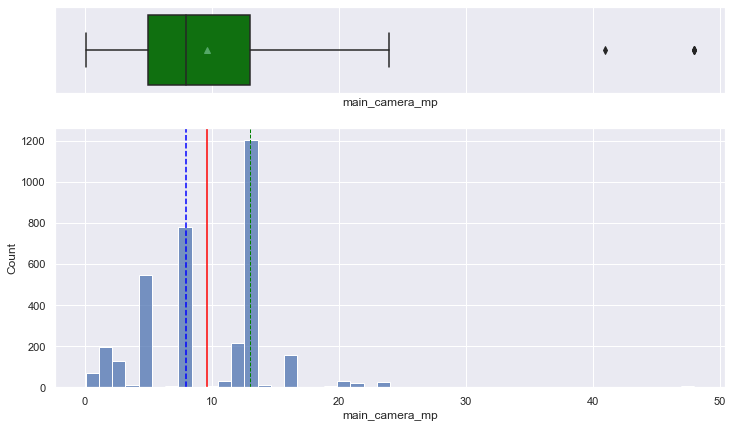

In [1858]:
# create histogram_boxplot for 'main_camera_mp'
histogram_boxplot(df2, 'main_camera_mp')

#### Observations:
* The distribution of main camera mp looks the same as before we filled it with missing values with its median values.

**`years_since_release`**

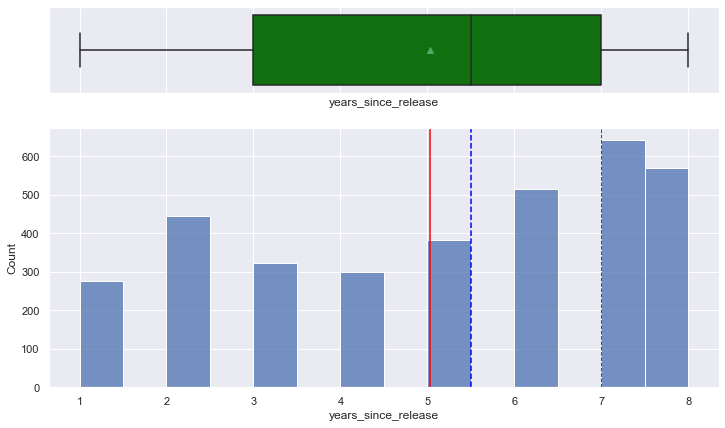

In [1859]:
# create histogram_boxplot for 'years_since_release'
histogram_boxplot(df2, 'years_since_release')

In [1860]:
df2.years_since_release.value_counts()/df2.years_since_release.shape[0]

7    0.185871
8    0.165026
6    0.149102
2    0.129126
5    0.110886
3    0.093225
4    0.086566
1    0.080197
Name: years_since_release, dtype: float64

#### Observations:
* The average of the years since released is 5 years. 
* Most of the devices in the dataset are 7 years since released. 

**We only check variables that are created or manipulated.**

## Building a Linear Regression model

In [1861]:
# add constant to the train data
x_train = sm.add_constant(x_train)
# add constant to the test data
x_test = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train).fit() # OLS model
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     268.0
Date:                   Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:40:16   Log-Likelihood:                 142.57
No. Observations:                   2417   AIC:                            -185.1
Df Residuals:                       2367   BIC:                             104.4
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2526      0.268     -0.944      0.345      -0.777       0.272
screen_size               0.0218      0.003      6.396      0.000       0.015       0.028
main_camera_mp            0.0211      0.001     14.117      0.000       0.018       0.024
selfie_camera_mp          0.0135      0.001     12.112      0.000       0.011       0.016
int_memory                0.0001   6.92e-05      1.811      0.070   -1.04e-05       0.000
ram                       0.0217      0.005      4.238      0.000       0.012       0.032
battery               -2.025e-05   7.24e-06     -2.797      0.005   -3.45e-05   -6.05e-06
weight                   -0.0002      0.000     -0.823      0.411      -0.001       0.000
days_used              4.812e-05   3.06e-05      1.570      0.117    -1.2e-05       0.000
normalized_new_price      0.4234      0.012     34.596      0.000       0.399       0.447
weight_log                0.3614      0.059      6.078      0.000       0.245       0.478
years_since_release      -0.0211      0.005     -4.648      0.000      -0.030      -0.012
brand_name_Alcatel        0.0149      0.047      0.315      0.753      -0.078       0.108
brand_name_Apple          0.0545      0.146      0.373      0.709      -0.232       0.341
brand_name_Asus           0.0089      0.048      0.187      0.851      -0.084       0.102
brand_name_BlackBerry    -0.0536      0.070     -0.768      0.443      -0.190       0.083
brand_name_Celkon        -0.0598      0.066     -0.908      0.364      -0.189       0.069
brand_name_Coolpad        0.0258      0.072      0.356      0.722      -0.116       0.168
brand_name_Gionee         0.0425      0.057      0.741      0.459      -0.070       0.155
brand_name_Google        -0.0195      0.084     -0.232      0.817      -0.184       0.145
brand_name_HTC           -0.0089      0.048     -0.186      0.852      -0.103       0.085
brand_name_Honor          0.0334      0.049      0.685      0.493      -0.062       0.129
brand_name_Huawei        -0.0016      0.044     -0.036      0.971      -0.088       0.085
brand_name_Infinix        0.1559      0.093      1.686      0.092      -0.025       0.337
brand_name_Karbonn        0.1099      0.067      1.648      0.099      -0.021       0.241
brand_name_LG            -0.0066      0.045     -0.147      0.883      -0.095       0.082
brand_name_Lava           0.0374      0.062      0.605      0.545      -0.084       0.159
brand_name_Lenovo         0.0431      0.045      0.960      0.337      -0.045       0.131
brand_name_Meizu         -0.0080      0.056     -0.144      0.885      -0.117       0.101
brand_name_Micromax      -0.0313      0.047     -0.658      0.510      -0.124       0.062
brand_name_Microsoft      0.0968      0.088      1.105      0.269      -0.075   

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [1862]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [1863]:
# check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22811,0.177856,0.84727,0.844042,4.266694


In [1864]:
# check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236801,0.183479,0.84453,0.836646,4.461123


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [1865]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [1866]:
# check VIF on train data
vif1= checking_vif(x_train)  
vif1_5= vif1[vif1['VIF']>5]
vif1_5

,feature,VIF
0,const,3255.813547
1,screen_size,7.800311
7,weight,20.445971
10,weight_log,19.578022
13,brand_name_Apple,13.114011
22,brand_name_Huawei,5.983868
35,brand_name_Others,9.714747
38,brand_name_Samsung,7.544146
47,os_iOS,11.815631


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [1867]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [1868]:
# specify the columns with high VIF
col_list = ['screen_size','weight','weight_log','brand_name_Apple','brand_name_Huawei','brand_name_Others','brand_name_Samsung','os_iOS'] 

# check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.844174,0.230459
1,brand_name_Others,0.844168,0.230463
2,brand_name_Apple,0.844165,0.230465
3,brand_name_Samsung,0.844152,0.230475
4,os_iOS,0.844135,0.230487
5,weight_log,0.841742,0.232250
6,screen_size,0.841481,0.232442
7,weight,0.838071,0.234928


In [1869]:
# specify the column to drop
col_to_drop = 'weight' 
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] # specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] #specify the test data from which to drop the column specified

# Check VIF now
vif2 = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif2[vif2['VIF']>5]

VIF after dropping  weight


,feature,VIF
0,const,208.983030
11,brand_name_Apple,13.052085
20,brand_name_Huawei,5.983684
33,brand_name_Others,9.680324
36,brand_name_Samsung,7.537336
45,os_iOS,11.750869


**We will keep those dummy variables for now since only a few variables with higher VIFs.**

In [1870]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() # OLS model
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:40:17   Log-Likelihood:                 95.629
No. Observations:                   2417   AIC:                            -95.26
Df Residuals:                       2369   BIC:                             182.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1626      0.069     16.829      0.000       1.027       1.298
screen_size               0.0430      0.002     18.235      0.000       0.038       0.048
main_camera_mp            0.0185      0.001     12.437      0.000       0.016       0.021
selfie_camera_mp          0.0127      0.001     11.219      0.000       0.010       0.015
int_memory                0.0001   7.05e-05      1.559      0.119   -2.83e-05       0.000
ram                       0.0218      0.005      4.186      0.000       0.012       0.032
battery                1.609e-07   6.99e-06      0.023      0.982   -1.35e-05    1.39e-05
days_used              5.766e-05   3.11e-05      1.851      0.064   -3.42e-06       0.000
normalized_new_price      0.4340      0.012     34.999      0.000       0.410       0.458
years_since_release      -0.0173      0.005     -3.815      0.000      -0.026      -0.008
brand_name_Alcatel        0.0139      0.048      0.288      0.773      -0.081       0.108
brand_name_Apple         -0.0265      0.149     -0.178      0.858      -0.318       0.265
brand_name_Asus           0.0249      0.048      0.514      0.607      -0.070       0.120
brand_name_BlackBerry    -0.0272      0.071     -0.383      0.702      -0.166       0.112
brand_name_Celkon        -0.0387      0.067     -0.578      0.563      -0.170       0.093
brand_name_Coolpad        0.0248      0.074      0.336      0.737      -0.120       0.169
brand_name_Gionee         0.0426      0.058      0.730      0.466      -0.072       0.157
brand_name_Google        -0.0265      0.086     -0.310      0.757      -0.194       0.141
brand_name_HTC           -0.0045      0.049     -0.091      0.927      -0.100       0.091
brand_name_Honor          0.0236      0.050      0.474      0.636      -0.074       0.121
brand_name_Huawei        -0.0003      0.045     -0.006      0.995      -0.088       0.088
brand_name_Infinix        0.1391      0.094      1.476      0.140      -0.046       0.324
brand_name_Karbonn        0.0907      0.068      1.336      0.182      -0.042       0.224
brand_name_LG            -0.0087      0.046     -0.191      0.849      -0.099       0.081
brand_name_Lava           0.0279      0.063      0.442      0.659      -0.096       0.151
brand_name_Lenovo         0.0512      0.046      1.121      0.263      -0.038       0.141
brand_name_Meizu         -0.0070      0.057     -0.123      0.902      -0.118       0.104
brand_name_Micromax      -0.0318      0.048     -0.656      0.512      -0.127       0.063
brand_name_Microsoft      0.1172      0.089      1.312      0.190      -0.058       0.292
brand_name_Motorola       0.0033      0.050      0.065      0.948      -0.095       0.102
brand_name_Nokia          0.0870      0.052      1.661      0.097      -0.016   

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [1871]:
# initial list of columns
cols = x_train2.columns.tolist()   # check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]   # check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

del cols[8:11]
selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', '4g_yes']


**We decided dropping all brand dummy variables since most of the variables have high p-values.**

In [1872]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [1873]:
olsmodel3 = sm.OLS(y_train, x_train3).fit() # fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
olsmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:40:17   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2451      0.045     27.547      0.000       1.157       1.334
screen_size              0.0433      0.001     28.862      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     14.000      0.000       0.016       0.021
selfie_camera_mp         0.0133      0.001     12.514      0.000       0.011       0.015
ram                      0.0156      0.004      3.618      0.000       0.007       0.024
days_used             6.346e-05   3.05e-05      2.084      0.037    3.75e-06       0.000
normalized_new_price     0.4255      0.011     39.450      0.000       0.404       0.447
years_since_release     -0.0193      0.004     -4.486      0.000      -0.028      -0.011
4g_yes                   0.0365      0.015      2.421      0.016       0.007       0.066
==============================================================================
Omnibus:                      222.889   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.179
Skew:                          -0.614   Prob(JB):                     2.86e-93
Kurtosis:                       4.650   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1874]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel3, x_train3, y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [1875]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel3, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [1876]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864746,0.222741
1525,4.448399,4.571687,-0.123288
1128,4.315353,4.284426,0.030926
3003,4.282068,4.258956,0.023112
2907,4.456438,4.451207,0.005231


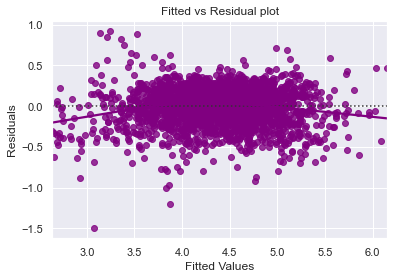

In [1877]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x='Fitted Values', y='Residuals', color='purple', lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Obervations:
* There is no pattern so we can say the model is linear and residuals are independent.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

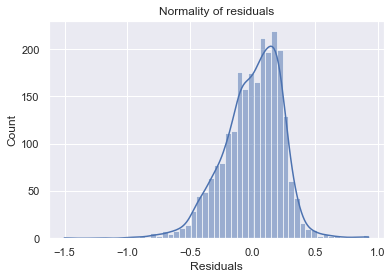

In [1878]:
# plot the distribution of residuals
sns.histplot(data=df_pred, x='Residuals', kde=True) 
plt.title("Normality of residuals")
plt.show()

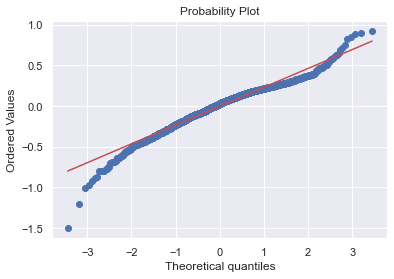

In [1879]:
import pylab
import scipy.stats as stats

# check Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [1880]:
# apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"]) 

ShapiroResult(statistic=0.9712677597999573, pvalue=1.2956769504974702e-21)

* The p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic.

In [1881]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# apply the Goldfeldquandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) 
lzip(name, test)

[('F statistic', 1.0648757500800876), ('p-value', 0.13825250199572814)]

* We get a p-value greater than 0.05, we can say that the residuals are homoscedastic.

## Final Model Summary

In [1882]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() # fit the final model
olsmodel_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                           20:40:22   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2451      0.045     27.547      0.000       1.157       1.334
screen_size              0.0433      0.001     28.862      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     14.000      0.000       0.016       0.021
selfie_camera_mp         0.0133      0.001     12.514      0.000       0.011       0.015
ram                      0.0156      0.004      3.618      0.000       0.007       0.024
days_used             6.346e-05   3.05e-05      2.084      0.037    3.75e-06       0.000
normalized_new_price     0.4255      0.011     39.450      0.000       0.404       0.447
years_since_release     -0.0193      0.004     -4.486      0.000      -0.028      -0.011
4g_yes                   0.0365      0.015      2.421      0.016       0.007       0.066
==============================================================================
Omnibus:                      222.889   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.179
Skew:                          -0.614   Prob(JB):                     2.86e-93
Kurtosis:                       4.650   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1883]:
# check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) # check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [1884]:
# check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test) # check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


**Observations**
* The train and test $R^2$ are 0.837 and 0.84, indicating that the model explains around 84% of the total variation in the train and test sets.
* This shows that the model is not overfitting.

## Actionable Insights and Recommendations

We analyzed a dataset provided by ReCell used devices information. The dataset contains 3454 prices of the used/refurbished phones and tablets and their attributes across 34 brands. The main objective is to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it. 

We identify the factors that affect the price of used phones and tablets are **screen size, main camera mp, selfie camera mp, ram, days used, normalized new price, years since release, and 4g network**. It is not surprising to see these 8 factors influence the used prices. Except for years since release, the rest of the attributes positively correlate with the used devices' price. ReCell can focus on the devices with higher new prices, which can be resold at a higher price. Normalized new price especially obviously affects the price of used devices. When the new price increases by 1 euro, the used price increases by 0.42 euros.

This dataset contains both phone and tablet information, which causes almost all attributes to have outliers. In this case, it is not appropriate to make any outlier treatments. I will suggest analyzing the phones and tablets markets separately. Some attributes could impact the prices of used phones but not for tablets. We also found out that around 50% of the years since released in the dataset are 6-8 years. In the technology field, development is rapid. Ram, internal memory, battery, or 5G network are different in 2021 compared to 2013. Additionally, 93.1% of the dataset is from the Android system, and the top three brands are Samsung, Huawei, and LG, except for Others. The result of the dataset can predict specific regions well for local or regional companies but would not provide a robust prediction for global companies.